In [1]:
from zillow_api.api_schema import ZillowPropertyResponse
from property import build_realty_property, get_property_price_history
from itertools import chain

import json
import pandas as pd
import seaborn as sns

In [2]:
responses = [
    'response_explorer/property_details_response.json',
    'response_explorer/sold_property_response.json',
    'response_explorer/for_rent_property_response.json',
]

properties = []

for response in responses:
    with open(response) as fp:
        data = json.load(fp)
    properties.append(ZillowPropertyResponse.Schema().dump(data))


In [3]:
len(properties)

3

In [4]:
rs = [build_realty_property(prop) for prop in properties]
df = pd.DataFrame(rs)
df

,zpid,price,property_tax_rate,time_on_zillow,zestimate,rent_zestimate,lot_size,annual_homeowners_insurance,beds,baths,description,living_area_value,year_built,page_view_count,home_status,monthly_hoa_fee
0,2054877337,260000,1.16,89 days,256900,1937,7100.0,1092,3,1,MOTIVATED SELLER! PRICED TO SELL FAST! This si...,1190,1942.0,3594,FOR_SALE,NaN
1,17481187,430500,1.16,26 days,431800,2299,7548.0,1808,3,2,"FANTASTIC VIEW across street of Lake,Perfect S...",1872,1980.0,39,RECENTLY_SOLD,88.0
2,17481174,2500,1.16,23 days,423900,2650,NaN,11,3,2,Home with GOLF COURSE backyard in the safe res...,2103,NaN,873,FOR_RENT,NaN


In [21]:
prop_price_histories = [get_property_price_history(prop) for prop in properties]
prop_price_events = list(chain(*prop_price_histories))
ph_df = pd.DataFrame(prop_price_events)


ph_df = ph_df.astype({
#     'price': 'int64', Cannot convert non-finite values (NA or inf) to integer
    'date': 'datetime64',
    'time': 'datetime64[ms]',  # Miliseconds since the Unix Epoch.
})

ph_df.sort_values(["zpid", 'date'])


,zpid,address,price_change_rate,date,source,positing_is_rental,time,price_per_square_foot,event,price
23,17481174,13255 Country Club Dr,0.000000,1997-07-30,Public Record,False,1997-07-30,58.0,Sold,123000.0
22,17481174,13255 Country Club Dr,1.601626,2021-03-26,Public Record,False,2021-03-26,152.0,Sold,320000.0
21,17481174,13255 Country Club Dr,0.000000,2021-10-09,Zillow Rental Manager,True,2021-10-09,1.0,Listed for rent,2450.0
20,17481174,13255 Country Club Dr,0.000000,2021-10-11,Zillow Rental Manager,True,2021-10-11,NaN,Listing removed,NaN
19,17481174,13255 Country Club Dr,0.020408,2023-12-30,Zillow Rentals,True,2023-12-30,1.0,Listed for rent,2500.0
18,17481187,13299 Seagull Dr,0.000000,1994-12-15,Public Record,False,1994-12-15,53.0,Sold,99450.0
17,17481187,13299 Seagull Dr,-0.044746,1995-12-11,Public Record,False,1995-12-11,51.0,Sold,95000.0
16,17481187,13299 Seagull Dr,2.894737,2005-12-20,Public Record,False,2005-12-20,198.0,Sold,370000.0
15,17481187,13299 Seagull Dr,-0.189189,2007-09-17,Public Record,False,2007-09-17,160.0,Sold,300000.0
14,17481187,13299 Seagull Dr,-0.300000,2008-07-18,Public Record,False,2008-07-18,112.0,Sold,210000.0


<AxesSubplot:xlabel='date', ylabel='price'>

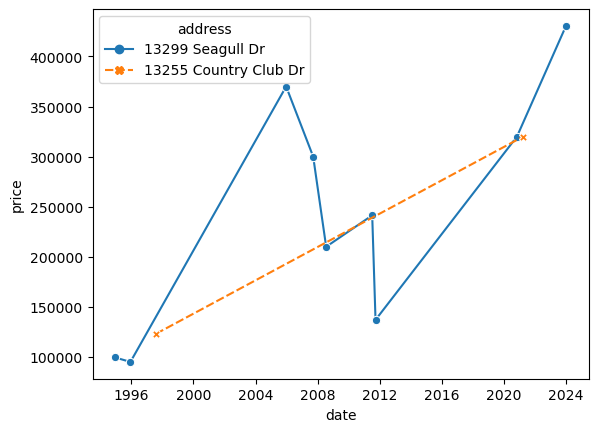

In [23]:
sns.lineplot(data=ph_df[(ph_df.event=='Sold')],
             x='date',
             y='price', 
             hue='address',
             style='address',
                markers=True,
             dashes=True,
            )

<AxesSubplot:xlabel='date', ylabel='price'>

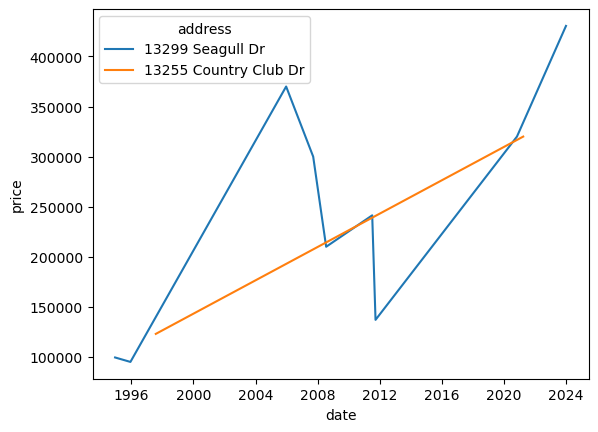

In [11]:
sns.lineplot(data=ph_df[ph_df.event=='Sold'], x='date', y='price', hue='address')